In [107]:
# This data is taken from the Wisconsin Diagnostic Breast Cancer Data Set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.base import clone
import itertools as it
from itertools import combinations
from sklearn.metrics import accuracy_score

In [108]:
class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self,X,y):
        X_train, X_test, y_train, y_test =  \
          train_test_split(X, y, test_size = self.test_size, random_state = self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ =  [self.indices_]
        score =  self._calc_score(X_train, y_train, X_test, y_test, self.indices_)

        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r = dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

                best = np.argmax(scores)
                self.indices_ = subsets[best]
                self.subsets_.append(self.indices_)
                dim -= 1

                self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]


    def _calc_score(self,X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score




In [109]:
# Note  for Class: 2 for benign, 4 for malignant)
df_bc = pd.read_csv('breast_cancer.csv',header = None)
df_bc.head()
df_bc.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object

In [110]:
df_bc.columns = ["id","thickness", "size", "shape", "madh", "epsize", "bnuc", "bchrom", "nNuc", "mit","class"]
#df_bc.head()
#df_bc.tail()
df_bc = df_bc.drop(['bnuc'], axis=1)
df_bc.head()
#df_bc.shape

,id,thickness,size,shape,madh,epsize,bchrom,nNuc,mit,class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


In [111]:
df_bc.shape

(699, 10)

In [112]:
X = df_bc.iloc[:,1:9].values
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
#X
#df_bc.apply(pd.to_numeric, errors='ignore')
#df_bc['bnuc'] = df_bc.bnuc.astype(float)
#df_bc.dtypes

In [113]:
y
#X

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4,
       2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2,
       4, 4,

In [114]:
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [115]:
#y_test
# Normalize the data
#stdsc = StandardScaler()
#X_train_std = stdsc.fit_transform(X_train)
#X_test_std = stdsc.fit_transform(X_test)
#X_test_std

In [116]:
#y_train
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train,y_train)

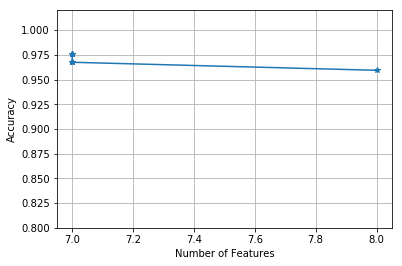

In [117]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='*')
plt.ylim([0.8, 1.02])

plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.grid()
plt.show()

In [118]:
print(sbs.scores_)

[0.95934959349593496, 0.96747967479674801, 0.96747967479674801, 0.96747967479674801, 0.96747967479674801, 0.97560975609756095, 0.97560975609756095, 0.97560975609756095, 0.97560975609756095]


In [119]:
X = df_bc.iloc[:,1:2].values
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
X

array([[ 5],
       [ 5],
       [ 3],
       [ 6],
       [ 4],
       [ 8],
       [ 1],
       [ 2],
       [ 2],
       [ 4],
       [ 1],
       [ 2],
       [ 5],
       [ 1],
       [ 8],
       [ 7],
       [ 4],
       [ 4],
       [10],
       [ 6],
       [ 7],
       [10],
       [ 3],
       [ 8],
       [ 1],
       [ 5],
       [ 3],
       [ 5],
       [ 2],
       [ 1],
       [ 3],
       [ 2],
       [10],
       [ 2],
       [ 3],
       [ 2],
       [10],
       [ 6],
       [ 5],
       [ 2],
       [ 6],
       [10],
       [ 6],
       [ 5],
       [10],
       [ 1],
       [ 3],
       [ 1],
       [ 4],
       [ 7],
       [ 9],
       [ 5],
       [10],
       [ 5],
       [10],
       [10],
       [ 8],
       [ 8],
       [ 5],
       [ 9],
       [ 5],
       [ 1],
       [ 9],
       [ 6],
       [ 1],
       [10],
       [ 4],
       [ 5],
       [ 8],
       [ 1],
       [ 5],
       [ 6],
       [ 1],
       [ 9],
       [10],
       [ 1],
       [ 1],

In [120]:
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [121]:
# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
knnpred = knn.predict(X_test)

# evaluate accuracy of our Logistic Regressin model on test data
#print(metrics.accuracy_score(y_test, knnpred))

print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))

The accuracy of KNN classifier on test set is : 0.89


In [122]:
X = df_bc.iloc[:,1:3].values
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
#X
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
knnpred = knn.predict(X_test)

# evaluate accuracy of our Logistic Regressin model on test data
#print(metrics.accuracy_score(y_test, knnpred))

print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))


The accuracy of KNN classifier on test set is : 0.94


In [123]:
X = df_bc.iloc[:,1:4].values
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
#X
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
knnpred = knn.predict(X_test)

# evaluate accuracy of our Logistic Regressin model on test data
#print(metrics.accuracy_score(y_test, knnpred))

print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))

The accuracy of KNN classifier on test set is : 0.95


In [124]:
X = df_bc.iloc[:,1:5].values
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
#X
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
knnpred = knn.predict(X_test)

# evaluate accuracy of our Logistic Regressin model on test data
#print(metrics.accuracy_score(y_test, knnpred))

print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))

The accuracy of KNN classifier on test set is : 0.94


In [125]:
X = df_bc.iloc[:,1:7].values
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
#X
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
knnpred = knn.predict(X_test)

# evaluate accuracy of our Logistic Regressin model on test data
#print(metrics.accuracy_score(y_test, knnpred))

print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))

The accuracy of KNN classifier on test set is : 0.97


In [126]:
X_men = df_bc.iloc[:,1:2].values

In [127]:
X_men

array([[ 5],
       [ 5],
       [ 3],
       [ 6],
       [ 4],
       [ 8],
       [ 1],
       [ 2],
       [ 2],
       [ 4],
       [ 1],
       [ 2],
       [ 5],
       [ 1],
       [ 8],
       [ 7],
       [ 4],
       [ 4],
       [10],
       [ 6],
       [ 7],
       [10],
       [ 3],
       [ 8],
       [ 1],
       [ 5],
       [ 3],
       [ 5],
       [ 2],
       [ 1],
       [ 3],
       [ 2],
       [10],
       [ 2],
       [ 3],
       [ 2],
       [10],
       [ 6],
       [ 5],
       [ 2],
       [ 6],
       [10],
       [ 6],
       [ 5],
       [10],
       [ 1],
       [ 3],
       [ 1],
       [ 4],
       [ 7],
       [ 9],
       [ 5],
       [10],
       [ 5],
       [10],
       [10],
       [ 8],
       [ 8],
       [ 5],
       [ 9],
       [ 5],
       [ 1],
       [ 9],
       [ 6],
       [ 1],
       [10],
       [ 4],
       [ 5],
       [ 8],
       [ 1],
       [ 5],
       [ 6],
       [ 1],
       [ 9],
       [10],
       [ 1],
       [ 1],

In [128]:
df_bc.describe()

,id,thickness,size,shape,madh,epsize,bchrom,nNuc,mit,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [129]:
df_bc.head()

,id,thickness,size,shape,madh,epsize,bchrom,nNuc,mit,class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


In [130]:
#X_men2 = 
alpha = [1,2,3,4,5,6,7,8]
beta = np.random.choice(len(alpha), 2, replace=False)
#df_bc.iloc[:,1:4].values
X_men2 = df_bc.iloc[:,beta].values

In [131]:
print(beta)

[7 6]


In [132]:
X_men2

array([[ 1,  3],
       [ 2,  3],
       [ 1,  3],
       ..., 
       [10,  8],
       [ 6, 10],
       [ 4, 10]])

In [133]:
# Randomly select 2 columns from the original bc dataframe
# and use those 2 columns for data for model fitting
alpha = [1,2,3,4,5,6,7,8]
beta = np.random.choice(len(alpha), 2, replace=False)
#df_bc.iloc[:,1:4].values
X_men2 = df_bc.iloc[:,beta].values
X = X_men2
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
#X
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
knnpred = knn.predict(X_test)

# evaluate accuracy of our Logistic Regressin model on test data
print()
print(beta)
print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))
print()


[5 4]
The accuracy of KNN classifier on test set is : 0.91



In [134]:
# Randomly select 3 columns from the original bc dataframe
# and use those 3 columns for data for model fitting
alpha = [1,2,3,4,5,6,7,8]
beta = np.random.choice(len(alpha), 3, replace=False)
#df_bc.iloc[:,1:4].values
X_men2 = df_bc.iloc[:,beta].values
X = X_men2
#X = df_bc.loc[:,1:8, df_bc.dtypes == np.int64]
y = df_bc.iloc[:,9].values
#X
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
knnpred = knn.predict(X_test)

# evaluate accuracy of our Logistic Regressin model on test data
print()
print(beta)
print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))
print()


[4 6 7]
The accuracy of KNN classifier on test set is : 0.94



In [135]:
# Mark Needham
# http://www.markhneedham.com/blog/2013/11/06/python-generate-all-combinations-of-a-list/
all_columns = ["Fare", "Sex", "Pclass", 'Embarked']
print(list(it.combinations(all_columns, 2)))

[('Fare', 'Sex'), ('Fare', 'Pclass'), ('Fare', 'Embarked'), ('Sex', 'Pclass'), ('Sex', 'Embarked'), ('Pclass', 'Embarked')]


In [136]:
alpha = [1,2,3,4,5,6,7,8]
print(list(it.combinations(alpha, 2)))

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]


In [137]:
my_columns = df_bc.columns[0:9]

In [138]:
my_columns

Index(['id', 'thickness', 'size', 'shape', 'madh', 'epsize', 'bchrom', 'nNuc',
       'mit'],
      dtype='object')

In [139]:
print(list(it.combinations(my_columns, 2)))

[('id', 'thickness'), ('id', 'size'), ('id', 'shape'), ('id', 'madh'), ('id', 'epsize'), ('id', 'bchrom'), ('id', 'nNuc'), ('id', 'mit'), ('thickness', 'size'), ('thickness', 'shape'), ('thickness', 'madh'), ('thickness', 'epsize'), ('thickness', 'bchrom'), ('thickness', 'nNuc'), ('thickness', 'mit'), ('size', 'shape'), ('size', 'madh'), ('size', 'epsize'), ('size', 'bchrom'), ('size', 'nNuc'), ('size', 'mit'), ('shape', 'madh'), ('shape', 'epsize'), ('shape', 'bchrom'), ('shape', 'nNuc'), ('shape', 'mit'), ('madh', 'epsize'), ('madh', 'bchrom'), ('madh', 'nNuc'), ('madh', 'mit'), ('epsize', 'bchrom'), ('epsize', 'nNuc'), ('epsize', 'mit'), ('bchrom', 'nNuc'), ('bchrom', 'mit'), ('nNuc', 'mit')]


In [140]:
combos = combinations(my_columns, 2)


In [141]:
combos2 = []
for item in combos:
    combos2.append(list(item))

In [142]:
print(combos2)

[['id', 'thickness'], ['id', 'size'], ['id', 'shape'], ['id', 'madh'], ['id', 'epsize'], ['id', 'bchrom'], ['id', 'nNuc'], ['id', 'mit'], ['thickness', 'size'], ['thickness', 'shape'], ['thickness', 'madh'], ['thickness', 'epsize'], ['thickness', 'bchrom'], ['thickness', 'nNuc'], ['thickness', 'mit'], ['size', 'shape'], ['size', 'madh'], ['size', 'epsize'], ['size', 'bchrom'], ['size', 'nNuc'], ['size', 'mit'], ['shape', 'madh'], ['shape', 'epsize'], ['shape', 'bchrom'], ['shape', 'nNuc'], ['shape', 'mit'], ['madh', 'epsize'], ['madh', 'bchrom'], ['madh', 'nNuc'], ['madh', 'mit'], ['epsize', 'bchrom'], ['epsize', 'nNuc'], ['epsize', 'mit'], ['bchrom', 'nNuc'], ['bchrom', 'mit'], ['nNuc', 'mit']]


In [143]:
y = df_bc.iloc[:,9].values
accurate = 0
best_combo = []
scores = []
# Use this loop to determine the highest accuracy obtained from the different combination of features
for idx in range(len(combos2)):
    #print(idx)
    xmen = df_bc[combos2[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen,y,test_size=0.3, random_state=0, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knnpred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, knnpred))
    print()
    print(combos2[idx])
    print('The accuracy of KNN classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, knnpred)))
    print()
    
# assing the highest accuracy score to the variable accurate    
accurate = max(scores) 

# Use this loop to determine the combination of features that gives the highest accuracy for a model
for idx in range(len(combos2)):
    #print(idx)
    xmen = df_bc[combos2[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen,y,test_size=0.3, random_state=0, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knnpred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, knnpred))
    if (metrics.accuracy_score(y_test, knnpred)) == accurate:
        best_combo.append(combos2[idx])
    
    


['id', 'thickness']
The accuracy of KNN classifier on test set is : 0.61


['id', 'size']
The accuracy of KNN classifier on test set is : 0.61


['id', 'shape']
The accuracy of KNN classifier on test set is : 0.61


['id', 'madh']
The accuracy of KNN classifier on test set is : 0.61


['id', 'epsize']
The accuracy of KNN classifier on test set is : 0.61


['id', 'bchrom']
The accuracy of KNN classifier on test set is : 0.61


['id', 'nNuc']
The accuracy of KNN classifier on test set is : 0.61


['id', 'mit']
The accuracy of KNN classifier on test set is : 0.61


['thickness', 'size']
The accuracy of KNN classifier on test set is : 0.94


['thickness', 'shape']
The accuracy of KNN classifier on test set is : 0.94


['thickness', 'madh']
The accuracy of KNN classifier on test set is : 0.95


['thickness', 'epsize']
The accuracy of KNN classifier on test set is : 0.93


['thickness', 'bchrom']
The accuracy of KNN classifier on test set is : 0.96


['thickness', 'nNuc']
The accuracy of KN

In [144]:
#xmen = df_bc[combos2[10]]


In [145]:
print('The highest accuracy for any two features is: ')
print(accurate)

The highest accuracy for any two features is: 
0.961904761905


In [146]:
print('The two features with the highest accuracy is: ')
print(best_combo)

The two features with the highest accuracy is: 
[['thickness', 'bchrom']]


In [147]:
#print(scores)
print(np.mean(scores))

0.857142857143


In [148]:
#for score in scores:
    #if score == accurate:
        #print(score)

In [149]:
print(len(scores))

72


In [150]:
# Note previous attempt with SVM linear kernel failed to produce a result in a reasonable period of time
# And, now for some Logistic Regression

y = df_bc.iloc[:,9].values
accurate_lr = 0
best_combo2 = []
scores = []
# Use this loop to determine the highest accuracy obtained from the different combination of features
for idx in range(len(combos2)):
    #print(idx)
    xmen = df_bc[combos2[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen,y,test_size=0.3, random_state=0, stratify=y)
    clf = LogisticRegression(C=100.0, random_state = 1)
    #clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train) 
    lrpred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, lrpred))
    print()
    print(combos2[idx])
    print('The accuracy of Logistic Regression classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, lrpred)))
    print()
    
# assing the highest accuracy score to the variable accurate    
accurate_lr = max(scores) 

# Use this loop to determine the combination of features that gives the highest accuracy for a model
for idx in range(len(combos2)):
    
    xmen = df_bc[combos2[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen,y,test_size=0.3, random_state=0, stratify=y)
    clf = LogisticRegression(C=100.0, random_state = 1)
    clf.fit(X_train, y_train) 
    lrpred = clf.predict(X_test)
    
    if (metrics.accuracy_score(y_test, lrpred)) == accurate_lr:
        best_combo2.append(combos2[idx])


['id', 'thickness']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'size']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'shape']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'madh']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'epsize']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'bchrom']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'nNuc']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'mit']
The accuracy of Logistic Regression classifier on test set is : 0.66


['thickness', 'size']
The accuracy of Logistic Regression classifier on test set is : 0.94


['thickness', 'shape']
The accuracy of Logistic Regression classifier on test set is : 0.96


['thickness', 'madh']
The accuracy of Logistic Regression classifier on test set is : 0.96


['thickness', 'epsize'

In [151]:
print('The highest accuracy for any two features using Logistic Regression is: ')
print(accurate_lr)
print()
print('The two features with the highest accuracy is: ')
print(best_combo2)

The highest accuracy for any two features using Logistic Regression is: 
0.966666666667

The two features with the highest accuracy is: 
[['thickness', 'bchrom']]


In [152]:
print('The average accuracy for any two features using Logistic Regression is: ')
print(np.mean(scores))

The average accuracy for any two features using Logistic Regression is: 
0.864814814815


In [153]:
combos3 = combinations(my_columns, 3)

In [154]:
combos3a = []
for item in combos3:
    combos3a.append(list(item))


In [155]:
combos3a

[['id', 'thickness', 'size'],
 ['id', 'thickness', 'shape'],
 ['id', 'thickness', 'madh'],
 ['id', 'thickness', 'epsize'],
 ['id', 'thickness', 'bchrom'],
 ['id', 'thickness', 'nNuc'],
 ['id', 'thickness', 'mit'],
 ['id', 'size', 'shape'],
 ['id', 'size', 'madh'],
 ['id', 'size', 'epsize'],
 ['id', 'size', 'bchrom'],
 ['id', 'size', 'nNuc'],
 ['id', 'size', 'mit'],
 ['id', 'shape', 'madh'],
 ['id', 'shape', 'epsize'],
 ['id', 'shape', 'bchrom'],
 ['id', 'shape', 'nNuc'],
 ['id', 'shape', 'mit'],
 ['id', 'madh', 'epsize'],
 ['id', 'madh', 'bchrom'],
 ['id', 'madh', 'nNuc'],
 ['id', 'madh', 'mit'],
 ['id', 'epsize', 'bchrom'],
 ['id', 'epsize', 'nNuc'],
 ['id', 'epsize', 'mit'],
 ['id', 'bchrom', 'nNuc'],
 ['id', 'bchrom', 'mit'],
 ['id', 'nNuc', 'mit'],
 ['thickness', 'size', 'shape'],
 ['thickness', 'size', 'madh'],
 ['thickness', 'size', 'epsize'],
 ['thickness', 'size', 'bchrom'],
 ['thickness', 'size', 'nNuc'],
 ['thickness', 'size', 'mit'],
 ['thickness', 'shape', 'madh'],
 ['thick

In [156]:
y = df_bc.iloc[:,9].values
accurate = 0
best_combo = []
scores = []
# Use this loop to determine the highest accuracy obtained from the different combination of features
for idx in range(len(combos3a)):
    #print(idx)
    xmen3 = df_bc[combos3a[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen3,y,test_size=0.3, random_state=0, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knnpred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, knnpred))
    print()
    print(combos3a[idx])
    print('The accuracy of KNN classifier on test set is : {:.3f}'.format(metrics.accuracy_score(y_test, knnpred)))
    print()
    
# assing the highest accuracy score to the variable accurate    
accurate = max(scores) 

# Use this loop to determine the combination of features that gives the highest accuracy for a model
for idx in range(len(combos3a)):
    #print(idx)
    xmen3 = df_bc[combos3a[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen3,y,test_size=0.3, random_state=0, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knnpred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, knnpred))
    if (metrics.accuracy_score(y_test, knnpred)) == accurate:
        best_combo.append(combos3a[idx])
    
    


['id', 'thickness', 'size']
The accuracy of KNN classifier on test set is : 0.614


['id', 'thickness', 'shape']
The accuracy of KNN classifier on test set is : 0.614


['id', 'thickness', 'madh']
The accuracy of KNN classifier on test set is : 0.614


['id', 'thickness', 'epsize']
The accuracy of KNN classifier on test set is : 0.614


['id', 'thickness', 'bchrom']
The accuracy of KNN classifier on test set is : 0.614


['id', 'thickness', 'nNuc']
The accuracy of KNN classifier on test set is : 0.614


['id', 'thickness', 'mit']
The accuracy of KNN classifier on test set is : 0.614


['id', 'size', 'shape']
The accuracy of KNN classifier on test set is : 0.614


['id', 'size', 'madh']
The accuracy of KNN classifier on test set is : 0.614


['id', 'size', 'epsize']
The accuracy of KNN classifier on test set is : 0.614


['id', 'size', 'bchrom']
The accuracy of KNN classifier on test set is : 0.614


['id', 'size', 'nNuc']
The accuracy of KNN classifier on test set is : 0.614


['id', 

In [157]:
print()
print('The highest accuracy for any 3 features using KNN classifier is: ')
print(accurate)
print()
print('The two features with the highest accuracy is: ')
print(best_combo)
print()


The highest accuracy for any 3 features using KNN classifier is: 
0.971428571429

The two features with the highest accuracy is: 
[['thickness', 'madh', 'bchrom']]



In [158]:
print('The average accuracy for any 3 features using KNN is: ')
print(np.mean(scores))

The average accuracy for any 3 features using KNN is: 
0.832879818594


In [159]:
# Note previous attempt with SVM linear kernel failed to produce a result in a reasonable period of time
# And, now for some Logistic Regression

y = df_bc.iloc[:,9].values
accurate_lr = 0
best_combo2 = []
scores = []
# Use this loop to determine the highest accuracy obtained from the different combination of features
for idx in range(len(combos3a)):
    #print(idx)
    xmen3 = df_bc[combos3a[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen3,y,test_size=0.3, random_state=0, stratify=y)
    clf = LogisticRegression(C=100.0, random_state = 1)
    #clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train) 
    lrpred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, lrpred))
    print()
    print(combos3a[idx])
    print('The accuracy of Logistic Regression classifier on test set is : {:.2f}'.format(metrics.accuracy_score(y_test, lrpred)))
    print()
    
# assing the highest accuracy score to the variable accurate    
accurate_lr = max(scores) 

# Use this loop to determine the combination of features that gives the highest accuracy for a model
for idx in range(len(combos3a)):
    
    xmen3 = df_bc[combos3a[idx]]
    X_train,X_test,y_train, y_test = train_test_split(xmen,y,test_size=0.3, random_state=0, stratify=y)
    clf = LogisticRegression(C=100.0, random_state = 1)
    clf.fit(X_train, y_train) 
    lrpred = clf.predict(X_test)
    
    if (metrics.accuracy_score(y_test, lrpred)) == accurate_lr:
        best_combo2.append(combos3a[idx])


['id', 'thickness', 'size']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'thickness', 'shape']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'thickness', 'madh']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'thickness', 'epsize']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'thickness', 'bchrom']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'thickness', 'nNuc']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'thickness', 'mit']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'size', 'shape']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'size', 'madh']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'size', 'epsize']
The accuracy of Logistic Regression classifier on test set is : 0.66


['id', 'size', 'b

In [160]:
print()
print('The highest accuracy for any 3 features using Logistic Regression classifier is: ')
print(accurate)
print()
print('The 3 features with the highest accuracy is: ')
print(best_combo)
print()


The highest accuracy for any 3 features using Logistic Regression classifier is: 
0.971428571429

The 3 features with the highest accuracy is: 
[['thickness', 'madh', 'bchrom']]



In [161]:
#print(len(my_columns))
for item in my_columns:
    print(item)

id
thickness
size
shape
madh
epsize
bchrom
nNuc
mit


In [162]:
   
np.mean(df_bc[df_bc['class'] == 2].thickness)
benign_mean_thick = np.mean(df_bc[df_bc['class'] == 2].thickness)


In [163]:
#df_bc.dtypes
np.mean(df_bc[df_bc['class'] == 4].thickness)
mal_mean_thick = np.mean(df_bc[df_bc['class'] == 4].thickness)

In [164]:
X = df_bc['thickness']
y = df_bc.iloc[:,9].values
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [165]:

y_train

array([2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4,
       4, 4,

In [166]:
#test_benign_thick_mean = np.mean(df_bc[df_bc['class'] == 2].thickness)
#test_mal_thick_mean = np.mean(df_bc[df_bc['class'] == 4].thickness)
y_test

array([2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 2])

In [167]:
benign_mean_thick

2.9563318777292578

In [168]:
mal_mean_thick

7.195020746887967

In [169]:
# This is an attempt to use only one feature to predict benign or malignant class
# in this case: thickness
def pred_by_mean_thick(thick):
    benign_mean_thick = np.mean(df_bc[df_bc['class'] == 2].thickness)
    mal_mean_thick = np.mean(df_bc[df_bc['class'] == 4].thickness)
    status = 2
    if (abs(thick - benign_mean_thick)) < (abs(thick - mal_mean_thick)) :
        status = 2
    else:
        status = 4
        
    return status

In [170]:
preds_by_thickness = []
#b_or_m = 0
for item in X_test:
    #b_or_m = pred_by_mean_thick(item)
    #preds_by_thickness.append(b_or_m)
    preds_by_thickness.append(pred_by_mean_thick(item))
    

In [171]:
#print(preds_by_thickness)
print(len(preds_by_thickness))

210


In [172]:
#print(y_test)
print(len(y_test))

210


In [173]:
correct = 0 
wrong = 0
for idx in range(len(y_test)):
    if preds_by_thickness[idx] == y_test[idx]:
        correct =  correct + 1
    else:
        wrong =  wrong + 1
        

In [174]:
print()
print(correct)
print(wrong)
print()


187
23



In [175]:
def pred_by_mean_thick2(thick,df):
    benign_mean_thick = np.mean(df[df['class'] == 2].thickness)
    mal_mean_thick = np.mean(df[df['class'] == 4].thickness)
    #print()
    #print(benign_mean_thick)
    #print()
    #print(mal_mean_thick)
    status = 2
    if (abs(thick - benign_mean_thick)) < (abs(thick - mal_mean_thick)) :
        status = 2
    else:
        status = 4
        
    return status

In [176]:
# Subset of dataframe by selecting columns
df_thick = df_bc[['thickness','class']]

In [177]:
df_thick.head()


,thickness,class
0,5,2
1,5,2
2,3,2
3,6,2
4,4,2


In [178]:
df_thick.shape

(699, 2)

In [179]:
# randomly mix rows of smaller dataframe by using sample
df_thick = df_thick.sample(frac=1)
#df_thick.head()
df_thick.shape
# How to split a dataframe into 2 parts by rows(horizontally)
df_train = df_thick.iloc[:524, :]
df_test = df_thick.iloc[524:, :]

In [180]:
#df_train.head()
print(df_train.shape)
print(df_test.shape)

(524, 2)
(175, 2)


In [181]:
preds_test_thick = []
thick_list = df_test['thickness']
#type(thick_list)
#preds_thick = df_train['thick'].apply(pred_by_mean_thick(df_train['thick']))
print(df_test.shape)
print()
print(len(thick_list))

(175, 2)

175


In [182]:
#print(thick_list)

In [183]:
# item is an element of the thickness values for the test set
# the function pred_by_means uses the training set df to determine
# the mean thickness for class 2 & class 4, then calculates the difference for
# a thickness value from each mean, then assigns a 2 or 4 depending on which mean is closest to the value
for item in thick_list:
    preds_test_thick.append(pred_by_mean_thick2(item,df_train))

In [184]:
print(preds_test_thick)
print()
print(len(preds_test_thick))

[2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2]

175


In [185]:
# force the df column to be a list!
y_test = list(df_test['class'])
print(y_test)

[2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2]


In [186]:
correct = 0 
wrong = 0
for idx in range(len(preds_test_thick)):
    if preds_test_thick[idx] == y_test[idx]:
        correct =  correct + 1
    else:
        wrong =  wrong + 1
        
print()
print(correct)
print(wrong)
print()


149
26



In [187]:
df_thick = df_thick.sample(frac=1)
X = df_thick['thickness']
y = df_thick['class']
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [188]:
#y_test
df_neo = pd.DataFrame(X_train,y_train)


In [189]:
df_neo.head()

,thickness
class,
2,NaN
2,NaN
4,4.0
2,NaN
2,NaN


In [190]:
# create dataframe using X_train & y_train, then use that as input for pred_by_mean_thick2
preds_test_thick = []
thick_list = X_test
#thick_list = list(y_test)
for item in thick_list:
    preds_test_thick.append(pred_by_mean_thick(item))


In [191]:
print(preds_test_thick)
#print(len(preds_test_thick))

[2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2]


In [192]:
correct = 0 
wrong = 0
test_label = list(y_test)
for idx in range(len(preds_test_thick)):
    if preds_test_thick[idx] == test_label[idx]:
        correct =  correct + 1
    else:
        wrong =  wrong + 1
        
print()
print(correct)
print(wrong)
print()


178
32



In [193]:
#df_bc.thickness.groupby([df_bc['class']== 2]).mean()
df_bc.loc[df_bc['class'] == 2].thickness.mean()
#df_bc.loc[df_bc['class'] == 4].thickness.mean()

2.9563318777292578

In [194]:
#df_bc.loc[df_bc['class'] == 4].thickness.mean()

label = 'thickness'
#df_bc[label].mean()
bad = df_bc.loc[df_bc['class'] == 4]
good = df_bc.loc[df_bc['class'] == 2]
good[label].mean()
#df_bc.loc[df_bc['class'] == 4].df_bc[label].mean()

2.9563318777292578

In [195]:
bad[label].mean()

7.195020746887967

In [196]:
# This function is a variation of previous functions (pred_by_mean_thick2)
# It has been modified to work with any single feature such as: mit, thickness,size, etc. 
def pred_by_feature(feat,label,df):
    # First create subsets based on class, could not find a way to avoid this step
    bad = df_bc.loc[df_bc['class'] == 4]
    good = df_bc.loc[df_bc['class'] == 2]
    good_mean = good[label].mean()
    bad_mean = bad[label].mean()
    
    status = 2
    if (abs(feat - good_mean)) < (abs(feat - bad_mean)) :
        status = 2
    else:
        status = 4
        
    return status

In [197]:
# a test of above function using only one value
my_value = pred_by_feature(1.5,'thickness',df_bc)
print(my_value)

2


In [198]:
# a test of above function using only one value
my_value = pred_by_feature(2.5,'size',df_bc)
print(my_value)

2


In [199]:
# Subset of dataframe by selecting columns
df_size = df_bc[['size','class']]
# randomly mix rows of smaller dataframe by using sample
df_size = df_size.sample(frac=1)
df_size.head()

df_size.shape
# How to split a dataframe into 2 parts by rows(horizontally)
df_train = df_size.iloc[:524, :]
df_test = df_size.iloc[524:, :]

In [200]:
#df_size.head()
#df_test.shape
df_train.shape

(524, 2)

In [201]:
# Now make predictions of benign or malignant based on mean size 
# for benign or malignant
preds_test_size = []
size_test = df_test['size']
for item in size_test:
    preds_test_size.append(pred_by_feature(item,'size',df_train))



In [202]:
print(len(list(df_test['class'])))

175


In [203]:
#print(len(preds_test_size))
print(preds_test_size)

[4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2]


In [204]:
test_label = list(df_test['class'])
print(test_label)

[4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4]


In [205]:
correct = 0 
wrong = 0
test_label = list(df_test['class'])
for idx in range(len(preds_test_size)):
    if preds_test_size[idx] == test_label[idx]:
        correct =  correct + 1
    else:
        wrong =  wrong + 1
        
print()
print(correct)
print(wrong)
print()


158
17



In [206]:
label = 'size'
bad = df_bc.loc[df_bc['class'] == 4]
good = df_bc.loc[df_bc['class'] == 2]
good_mean = good[label].mean()
bad_mean = bad[label].mean()
print(good_mean)
print()
print(bad_mean)

1.3253275109170306

6.572614107883817


In [207]:
df_train.head()

,size,class
231,8,4
683,1,2
419,3,2
555,3,2
673,3,2


In [208]:
# Subset of dataframe by selecting columns
df_mit = df_bc[['mit','class']]
# randomly mix rows of smaller dataframe by using sample
df_mit = df_mit.sample(frac=1)


df_mit.shape
# How to split a dataframe into 2 parts by rows(horizontally)
df_train = df_mit.iloc[:524, :]
df_test = df_mit.iloc[524:, :]


In [209]:
df_mit.head()

,mit,class
1,1,2
332,1,2
119,1,2
250,1,2
604,2,4


In [210]:
# Now make predictions of benign or malignant based on mean size 
# for benign or malignant
preds_test_mit = []
mit_test = df_test['mit']
for item in mit_test:
    preds_test_mit.append(pred_by_feature(item,'mit',df_train))

In [211]:
correct = 0 
wrong = 0
test_label = list(df_test['class'])
for idx in range(len(preds_test_mit)):
    if preds_test_mit[idx] == test_label[idx]:
        correct =  correct + 1
    else:
        wrong =  wrong + 1
        
print()
print(correct)
print(wrong)
print()
print(round(correct/(correct + wrong),2) )
#print(correct/(correct + wrong))


138
37

0.79


In [212]:
label = 'mit'
bad = df_bc.loc[df_bc['class'] == 4]
good = df_bc.loc[df_bc['class'] == 2]
good_mean = good[label].mean()
bad_mean = bad[label].mean()
print(good_mean)
print()
print(bad_mean)

1.0633187772925765

2.5892116182572615
